#Commands
#Shift+return to run code
#Cell > markdown
#To comment code


In [26]:
#What's in my workspace?
!ls

Booleans.ipynb
Built-in Functions.ipynb
Converting data objects to pandas DataFrame.ipynb
Counting words.ipynb
Data Manipulation with pandas.ipynb
Dates and Times - now() function.ipynb
Dictionaries.ipynb
Holidays in Python.ipynb
If statements.ipynb
Import Online Datasets.ipynb
Lists.ipynb
Load csv file to pandas dataframe.ipynb
Loops.ipynb
Matplotlib and Data Visualization.ipynb
Numpy Arrays.ipynb
Pandas cheat sheet.ipynb
Plotly.ipynb
Plydata library - Tidyverse in Python.ipynb
Python the hard way - list comprehension.ipynb
Read txt file with reader.ipynb
Reading CSV files in current working directory.ipynb
Reading email addresses from txt file.ipynb
Runtime - Timing your code.ipynb
Unpacking data objects.ipynb
Working with Dates and Times in Python.ipynb
Writing Efficient Code with pandas.ipynb
datasets


## Import Data

In [1]:
#import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import csv file
#builds a dataframe from csv file
marketing = pd.read_csv('datasets/marketing.csv')

sales = pd.read_csv("https://assets.datacamp.com/production/repositories/5386/datasets/5110afec30fc30bc5f3cf67b188d1513c3d6d940/sales_subset.csv")  
    
homelessness = pd.read_csv("https://assets.datacamp.com/production/repositories/5386/datasets/1a0ab2e8557930ec06473c16521874e516a216ae/homelessness.csv")  
   
temperatures = pd.read_csv("https://assets.datacamp.com/production/repositories/5386/datasets/47f5fde162bae3549ca7d5c26fb4c4639f100f28/temperatures.csv")  

In [29]:
#examine the data
display(marketing.tail(5))

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True
10036,a100007294,1/6/18,Facebook,control,False,German,German,0-18 years,1/17/18,NaN,Email,True


In [30]:
# Check column data types and non-missing values
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


In [31]:
#Shape is an attribute so it doesn't need 
print(marketing.shape)

(10037, 12)


# Manually create a DataFrame

In [32]:
df = pd.DataFrame({
    'A': [1,2,3],
    'B': [4,5,6],
    'C': [7,8,9]},
    index=['x', 'y', 'z'])

print(df)

   A  B  C
x  1  4  7
y  2  5  8
z  3  6  9


# Selecting columns in pandas

In [33]:
df['A']

x    1
y    2
z    3
Name: A, dtype: int64

If your column name has a space in it, or if the name clashes with a DataFrame attribute, then the convenient dot notation won't work.

In [34]:
df.A

x    1
y    2
z    3
Name: A, dtype: int64

In [35]:
df[['A', 'B']]

,A,B
x,1,4
y,2,5
z,3,6


# Subsetting rows .iloc

In [36]:
# first row, all columns
df.iloc[0]

A    1
B    4
C    7
Name: x, dtype: int64

In [37]:
# first row, all columns same as above
df.iloc[0, :]

A    1
B    4
C    7
Name: x, dtype: int64

In [38]:
#First 2 rows, all columns
df.iloc[[0,1], :]

,A,B,C
x,1,4,7
y,2,5,8


# Subsetting rows .loc

In [39]:
#By index x row
df.loc['x']

A    1
B    4
C    7
Name: x, dtype: int64

In [40]:
#By index x and y rows
df.loc[['x', 'y']]

,A,B,C
x,1,4,7
y,2,5,8


# Conditional Subsetting

In [41]:
# Print the first row using iloc
#print(marketing.iloc[0])

# Print all the rows where language_displayed == 'German'
print(marketing.loc[marketing.language_displayed == 'German'])

          user_id date_served marketing_channel          variant converted  \
5      a100000034      1/1/18         House Ads  personalization      True   
19     a100000048      1/2/18         House Ads  personalization      True   
20     a100000049      1/2/18         House Ads  personalization      True   
41     a100000060      1/2/18         House Ads  personalization      True   
42     a100000060      1/1/18         House Ads  personalization     False   
...           ...         ...               ...              ...       ...   
10032  a100007290     1/17/18             Email          control      True   
10033  a100007291     1/17/18             Email          control      True   
10034  a100007292      1/5/18         Instagram          control     False   
10035  a100007293     1/17/18             Email          control      True   
10036  a100007294      1/6/18          Facebook          control     False   

      language_displayed language_preferred    age_group date_s

In [42]:
# Print all the rows where language is German and is still a customer
print(marketing[(marketing.language_displayed == 'German') & (marketing.is_retained  == True)])

          user_id date_served marketing_channel          variant converted  \
5      a100000034      1/1/18         House Ads  personalization      True   
20     a100000049      1/2/18         House Ads  personalization      True   
60     a100000072      1/3/18         House Ads          control      True   
142    a100000252      1/7/18         House Ads          control      True   
163    a100000273      1/8/18         House Ads          control      True   
259    a100000348     1/10/18          Facebook  personalization     False   
513    a100000668     1/16/18             Email  personalization      True   
524    a100000679     1/16/18             Email  personalization      True   
530    a100000685     1/16/18             Email  personalization      True   
9996   a100007254     1/15/18             Email  personalization      True   
9997   a100007255     1/15/18             Email  personalization      True   
9998   a100007256     1/15/18             Email  personalization

# Select rows and columns

In [80]:
#Rows based on a condition and some columns
print(marketing.loc[marketing['marketing_channel'] == 'Facebook', ['variant', 'converted']])

               variant converted
34     personalization     False
40     personalization     False
233    personalization     False
239    personalization     False
259    personalization     False
...                ...       ...
9986           control     False
9989           control     False
9992           control     False
9995           control     False
10036          control     False

[1860 rows x 2 columns]


In [81]:
#The first 3 columns and 3 rows
# 3 rows and 3 columns with iloc
print(marketing.iloc[0:3, 0:3])

      user_id date_served marketing_channel
0  a100000029  2018-01-01         House Ads
1  a100000030  2018-01-01         House Ads
2  a100000031  2018-01-01         House Ads


# Converting Data Objects

In [38]:
#info is same as str function in R
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [41]:
#Type is same as class function in R
type(marketing)

pandas.core.frame.DataFrame

In [83]:
# Convert to lower case
marketing['language_displayed'].str.lower().head()

0    english
1    english
2    english
3    english
4    english
Name: language_displayed, dtype: object

In [84]:
# Convert to upper case
marketing['user_id'].str.upper().head()

0    A100000029
1    A100000030
2    A100000031
3    A100000032
4    A100000033
Name: user_id, dtype: object

In [50]:
marketing.dtypes

user_id                object
date_served            object
marketing_channel      object
variant                object
converted              object
language_displayed     object
language_preferred     object
age_group              object
date_subscribed        object
date_canceled          object
subscribing_channel    object
is_retained            object
dtype: object

In [51]:
# Use the cat accessor to print the categories in the time column
print(marketing['marketing_channel'].cat.categories)
#print(tips['time'].cat.categories)

AttributeError: Can only use .cat accessor with a 'category' dtype

str.strip() removes all leading and trailing whitespaces

In [ ]:
df = pd.DataFrame({
    'A': [1,2,3],
    'B': [4,5,6],
    'C': [7,8,9]},
    index=['x', 'y', 'z'])

print(df)

## Aggregating DataFrames

In [43]:
#Mean and median

# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales["weekly_sales"].mean())

# Print the median of weekly_sales
print(sales["weekly_sales"].median())

   Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0           0      1    A           1  2010-02-05      24924.50       False   
1           1      1    A           1  2010-03-05      21827.90       False   
2           2      1    A           1  2010-04-02      57258.43       False   
3           3      1    A           1  2010-05-07      17413.94       False   
4           4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------

In [44]:
#Summarizing dates
# Print the maximum of the date column
print(sales['date'].max())
# Print the minimum of the date column
print(sales['date'].min())

2012-10-26
2010-02-05


In [45]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

16.583333333333336


## Counting

In [46]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]==True].drop_duplicates(subset="date")

# Print date col of holiday_dates
print(holiday_dates)

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
901          901      2    A           1  2010-02-05      35034.06   
1798        1798      4    A           1  2010-02-05      38724.42   
2699        2699      6    A           1  2010-02-05      25619.00   
3593        3593     10    B           1  2010-02-05      40212.84   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0          False       5.727778              0.679451         8.106  
901        False       4.550000              0.679451         8.324  
1798       False       6.533333              0.686319         8.623  
2699       False       4.683333              0.679451         7.259  
3593       False      12.411111              0.782478         9.765  
    Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0            0      1    A           1  2010-02-05      24924.50       False   

In [47]:
#Counting categorical variables
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    11
B     1
Name: type, dtype: int64
A    0.916667
B    0.083333
Name: type, dtype: float64
1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


# Missing Values

In [30]:
df = pd.DataFrame({
    'A': [33,16,np.NaN],
    'B': [11,np.NaN,7],
    'C': [np.NaN ,26,np.NaN]},
    index=['x', 'y', 'z'])

print(df)

      A     B     C
x  33.0  11.0   NaN
y  16.0   NaN  26.0
z   NaN   7.0   NaN


In [31]:
#Check for missing values in Column A
pd.isnull(df['A'])

x    False
y    False
z     True
Name: A, dtype: bool

In [32]:
#Print all rows with missing values in Column C
print(df.loc[df['C'].isnull()])

      A     B   C
x  33.0  11.0 NaN
z   NaN   7.0 NaN


In [33]:
#Mean of column A
colA_mean = df['A'].mean()

In [34]:
#Mean imputation
print(df['A'].fillna(colA_mean))

x    33.0
y    16.0
z    24.5
Name: A, dtype: float64


# Groupby() & Grouped Summary Stats

In [36]:
# Mean sales by type
print(sales.groupby('type')['weekly_sales'].mean())


type
A    23674.667242
B    25696.678370
Name: weekly_sales, dtype: float64


In [37]:
# Mean sales grouped by 2 columns
print(sales.groupby(['type', 'is_holiday'])['weekly_sales'].mean())

type  is_holiday
A     False         23768.583523
      True            590.045250
B     False         25751.980533
      True            810.705000
Name: weekly_sales, dtype: float64


What percent of sales occurred at each store type?
While .groupby() is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: "supercenters," "discount stores," and "neighborhood markets," encoded in this dataset as type "A," "B," and "C." In this exercise, you'll calculate the total sales made at each store type, without using .groupby(). You can then use these numbers to see what proportion of Walmart's total sales were made at each type.

In [48]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [49]:
#Calculations with .groupby()
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64
type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


## Multiple grouped summaries 

Earlier in this chapter, you saw that the .agg() method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including: np.min, np.max, np.mean, and np.median.

In [50]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min, np.max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")["unemployment", "fuel_price_usd_per_l"].agg([np.min, np.max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
             amin   amax      mean median                 amin      amax   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


/var/folders/b4/r2b0spdj3mz03127m_zx742r0000gn/T/ipykernel_19742/3728837400.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unemp_fuel_stats = sales.groupby("type")["unemployment", "fuel_price_usd_per_l"].agg([np.min, np.max, np.mean, np.median])


## Pivot tables

Pivot tables are the standard way of aggregating data in spreadsheets. In pandas, pivot tables are essentially just another way of performing grouped calculations. That is, the .pivot_table() method is just an alternative to .groupby().

In this exercise, you'll perform calculations using .pivot_table() to replicate the calculations you performed in the last lesson using .groupby().

In [51]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type")

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [52]:
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index="type", aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [53]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", index="type", columns = "is_holiday")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False       True
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


# Missing values

The .pivot_table() method has several useful arguments, including fill_value and margins.

fill_value replaces missing values with a real value (known as imputation). What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute a dummy value.
margins is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.

In [54]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]


In [55]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


# Slicing DataFrames

Setting and removing indexes
pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In [56]:
# Look at temperatures
print(temperatures)

# Index temperatures by city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind)

# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...         ...      ...            ...         ...
16495       16495  2013-05-01     Xian          China      18.979
16496       16496  2013-06-01     Xian          China      23.522
16497       16497  2013-07-01     Xian          China      25.251
16498       16498  2013-08-01     Xian          China      24.528
16499       16499  2013-09-01     Xian          China         NaN

[16500 rows x 5 columns]
         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidj

Subsetting with .loc[]
The killer feature for indexes is .loc[]: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using .loc[] can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

In [57]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
...           ...         ...               ...     ...         ...
13360       13360  2013-05-01  Saint Petersburg  Russia      12.355
13361       13361  2013-06-01  Saint Petersburg  Russia      17.185
13362       13362  2013-07-01  Saint Petersburg  Russia      17.234
13363       13363  2013-08-01  Saint Petersburg  Russia      17.153
13364       13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 5 columns]
                  Unnamed: 0        date country  avg_temp_c
city                                                        
Moscow                 10725  2000-01-

Setting multi-level indexes
Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.

The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

In [58]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"),("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


## Sorting by index values

In [59]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level = "city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country", "city"], ascending=[True, False]))

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]
                       Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan      

# Slicing index values

Slicing index values


Slicing lets you select consecutive elements of an object using first:last syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the .loc[] method.

Compared to slicing lists, there are a few things to remember.

You can only slice an index if the index is sorted (using .sort_index()).
To slice at the outer level, first and last can be strings.
To slice at inner levels, first and last should be tuples.
If you pass a single slice to .loc[], it will slice the rows.

In [60]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan": "Russia"])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore": "Moscow"])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan", "Lahore"): ("Russia","Moscow")])

                           Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
...                               ...         ...         ...
Russia   Saint Petersburg       13360  2013-05-01      12.355
         Saint Petersburg       13361  2013-06-01      17.185
         Saint Petersburg       13362  2013-07-01      17.234
         Saint Petersburg       13363  2013-08-01      17.153
         Saint Petersburg       13364  2013-09-01         NaN

[1155 rows x 3 columns]
                    Unnamed: 0        date  avg_temp_c
country city                                          
Mexico  Mexico           10230  2000-01-01      12.694
    

# Create new columns

In [61]:
#print a data type of a single column 
print(marketing['converted'].dtype)

object


In [62]:
# change the date type of a column
marketing['converted'] = marketing['converted'].astype('bool')

In [63]:
#check results - should now be boolean
print(marketing['converted'].dtype)

bool


In [64]:
#Creating new boolean columns
marketing['is_house_ads']  = np.where(marketing['marketing_channel'] == 'House Ads', True, False
)

In [65]:
print(marketing.is_house_ads.head(3))

0    True
1    True
2    True
Name: is_house_ads, dtype: bool


In [66]:
#Broadcasting - a new column can be created on the fly
marketing['id'] = 0

#check results
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ads,id
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True,True,0
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True,True,0
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True,True,0
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True,True,0
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True,True,0


Adding new columns
		a. Adding new columns that derive information from existing data or based on domain knowledge is known as Feature Engineering. Even in relatively simple datasets, there are always new characteristics you could pull out to create a more in-depth analysis.
		b. One of the most critical skills a data scientist needs to learn is how to identify opportunities for feature engineering.
	


In [67]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [68]:
# Add the new column is_correct_lang
marketing['is_correct_lang']  = np.where(marketing['language_displayed'] == marketing['language_preferred'], 'Yes', 'No'
)

print(marketing.is_correct_lang.head(3))

0    Yes
1    Yes
2    Yes
Name: is_correct_lang, dtype: object


## Date Columns

Currently, the date columns in the marketing DataFrame are being incorrectly read as objects. We need to convert these columns to date columns to be able to use Python and pandas' robust date manipulation and formatting capabilities.


In this exercise, you will practice reading the CSV with proper date columns and create a day of the week columns

In [75]:
# Import marketing.csv with date columns
#marketing = pd.read_csv('datasets/marketing.csv')
marketing = pd.read_csv('datasets/marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled']) 

In [72]:
marketing['day_served'] = marketing['date_served'].dt.dayofweek

AttributeError: Can only use .dt accessor with datetimelike values

In [76]:
# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

Initial exploratory analysis
		a. How many unique users see our assets each day
			i. need to use group by method
                  1) We pass "date served" as the argument to groupby()
			  2) We select the userid column outside of the groupby
                3.And use nunique method to count the number of unique users each day

In [77]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
 
# Print head of daily_users
print(daily_users.head(5))

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


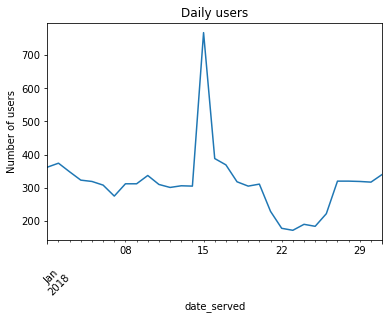

In [78]:
#Visualizing daily marketing reach

# Plot daily_subscribers
daily_users.plot()
 
# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')
 
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)
 
# Display the plot
plt.show()

In [ ]:
#Calculating conversion rate

# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()
 
# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']== True]['user_id'].nunique()
 
# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")


In [ ]:
#Calculating retention rate

# Calculate the number of subscribers
total_subscribers = marketing[marketing['converted']==True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained']==True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

In [ ]:
#Customer Segmentation
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = marketing[marketing['language_displayed'] == 'English']['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers['converted']==True]['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

In [ ]:
#Comparing language conversion rate (ii)
#Group by language_displayed and count unique users
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = marketing[marketing['converted']==True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

# Tidy data

In [53]:
df = pd.DataFrame({
    'A': [1,2,3],
    'B': [4,5,6]})

print(df)

   A  B
0  1  4
1  2  5
2  3  6


In [54]:
#Apply function axis = 0 applies a function column-wise which is the default
df.apply(np.mean, axis = 0)

A    2.0
B    5.0
dtype: float64

In [55]:
#Apply function axis = 1 applies a function row-wise
df.apply(np.mean, axis = 1)

0    2.5
1    3.5
2    4.5
dtype: float64

Melt function can be used to transform data into a tidy format.